# Color Threshold, Green Screen

### Import resources

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [4]:
# Read in the image
# image = mpimg.imread('images/car_green_screen.jpg')
image = skimage.io.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


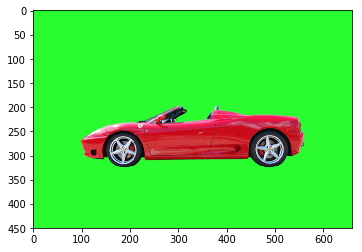

In [5]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [37]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,200,0])
upper_green = np.array([100,255,120])


### Create a mask

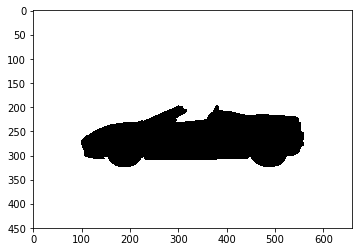

In [38]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

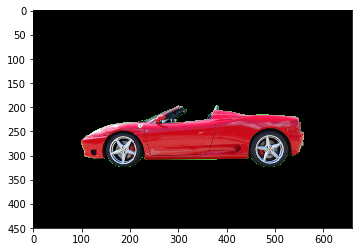

In [39]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0,0,0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

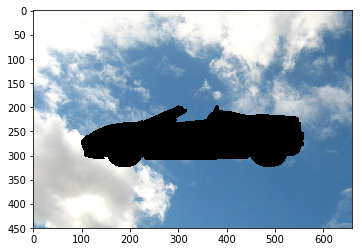

In [42]:
# Load in a background image, and convert it to RGB 
# background_image = mpimg.imread('images/sky.jpg')
background_image = skimage.io.imread('images/sky.jpg')

## TODO: Crop it or resize the background to be the right size (450x660)
crop_background = background_image[:450,:660]

## TODO: Mask the cropped background so that the car area is blocked
# Hint mask the opposite area of the previous image
crop_background[mask == 0] = [0,0,0]


## TODO: Display the background and make sure 
plt.imshow(crop_background, cmap='gray')

### Create a complete image

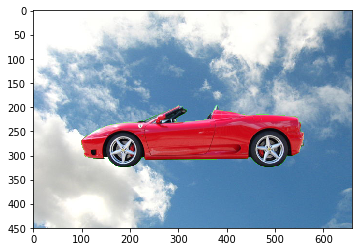

In [43]:
## TODO: Add the two images together to create a complete image!
complete_image = masked_image + crop_background

plt.imshow(complete_image, cmap='gray')